<a href="https://colab.research.google.com/github/eckatherina/CMF_AHF/blob/main/%20CMF_AHF/notebooks/lasso_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Data

Загужаем данные, делим на тестовый и тренировочные наборы

In [ ]:
df = pd.read_csv("macro.csv", parse_dates=['date'], index_col=['date'])
df

,Unnamed: 0,target,DTB3,MCUMFN,CPIAUCSL,GEPU_current,IPG211111CN,Killian,IRLTLT01USM156N,M2SL,Close,CFNAI,UNRATE,Imports,Production,Stocks
date,,,,,,,,,,,,,,,,
1997-01-02,0,25.55,5.033810,82.0867,159.400,76.906476,98.3693,-4.346762,6.58,3834.6,786.16,0.26,5.3,7218.20,6489.4,838890.8
1997-01-03,1,25.55,5.033810,82.0867,159.400,76.906476,98.3693,-4.346762,6.58,3834.6,786.16,0.26,5.3,7218.20,6489.4,838890.8
1997-01-06,2,26.25,5.033810,82.0867,159.400,76.906476,98.3693,-4.346762,6.58,3834.6,786.16,0.26,5.3,7218.20,6489.4,838890.8
1997-01-07,3,26.25,5.033810,82.0867,159.400,76.906476,98.3693,-4.346762,6.58,3834.6,786.16,0.26,5.3,7218.20,6489.4,838890.8
1997-01-08,4,26.55,5.033810,82.0867,159.400,76.906476,98.3693,-4.346762,6.58,3834.6,786.16,0.26,5.3,7218.20,6489.4,838890.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25,6081,58.47,0.031304,76.3791,265.028,212.409145,165.8403,24.093239,1.61,19853.7,3972.89,2.22,6.0,5686.25,10975.0,1138710.0
2021-03-26,6082,60.93,0.031304,76.3791,265.028,212.409145,165.8403,24.093239,1.61,19853.7,3972.89,2.22,6.0,5686.25,10975.0,1138710.0
2021-03-29,6083,61.49,0.031304,76.3791,265.028,212.409145,165.8403,24.093239,1.61,19853.7,3972.89,2.22,6.0,5686.25,10975.0,1138710.0


In [ ]:
df = df[list(df.columns[1:])]
df

,target,DTB3,MCUMFN,CPIAUCSL,GEPU_current,IPG211111CN,Killian,IRLTLT01USM156N,M2SL,Close,CFNAI,UNRATE,Imports,Production,Stocks
date,,,,,,,,,,,,,,,
1997-01-03,25.55,5.033810,82.0867,159.400,76.906476,98.3693,-4.346762,6.58,3834.6,786.16,0.26,5.3,7218.20,6489.4,838890.8
1997-01-06,26.25,5.033810,82.0867,159.400,76.906476,98.3693,-4.346762,6.58,3834.6,786.16,0.26,5.3,7218.20,6489.4,838890.8
1997-01-07,26.25,5.033810,82.0867,159.400,76.906476,98.3693,-4.346762,6.58,3834.6,786.16,0.26,5.3,7218.20,6489.4,838890.8
1997-01-08,26.55,5.033810,82.0867,159.400,76.906476,98.3693,-4.346762,6.58,3834.6,786.16,0.26,5.3,7218.20,6489.4,838890.8
1997-01-09,26.30,5.033810,82.0867,159.400,76.906476,98.3693,-4.346762,6.58,3834.6,786.16,0.26,5.3,7218.20,6489.4,838890.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25,58.47,0.031304,76.3791,265.028,212.409145,165.8403,24.093239,1.61,19853.7,3972.89,2.22,6.0,5686.25,10975.0,1138710.0
2021-03-26,60.93,0.031304,76.3791,265.028,212.409145,165.8403,24.093239,1.61,19853.7,3972.89,2.22,6.0,5686.25,10975.0,1138710.0
2021-03-29,61.49,0.031304,76.3791,265.028,212.409145,165.8403,24.093239,1.61,19853.7,3972.89,2.22,6.0,5686.25,10975.0,1138710.0


In [ ]:
y = df["target"]
y

date
1997-01-03    25.55
1997-01-06    26.25
1997-01-07    26.25
1997-01-08    26.55
1997-01-09    26.30
              ...  
2021-03-25    58.47
2021-03-26    60.93
2021-03-29    61.49
2021-03-30    60.55
2021-03-31    59.19
Name: target, Length: 6085, dtype: float64

In [ ]:
X = df[list(df.columns[1:])]
X

,DTB3,MCUMFN,CPIAUCSL,GEPU_current,IPG211111CN,Killian,IRLTLT01USM156N,M2SL,Close,CFNAI,UNRATE,Imports,Production,Stocks
date,,,,,,,,,,,,,,
1997-01-03,5.033810,82.0867,159.400,76.906476,98.3693,-4.346762,6.58,3834.6,786.16,0.26,5.3,7218.20,6489.4,838890.8
1997-01-06,5.033810,82.0867,159.400,76.906476,98.3693,-4.346762,6.58,3834.6,786.16,0.26,5.3,7218.20,6489.4,838890.8
1997-01-07,5.033810,82.0867,159.400,76.906476,98.3693,-4.346762,6.58,3834.6,786.16,0.26,5.3,7218.20,6489.4,838890.8
1997-01-08,5.033810,82.0867,159.400,76.906476,98.3693,-4.346762,6.58,3834.6,786.16,0.26,5.3,7218.20,6489.4,838890.8
1997-01-09,5.033810,82.0867,159.400,76.906476,98.3693,-4.346762,6.58,3834.6,786.16,0.26,5.3,7218.20,6489.4,838890.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25,0.031304,76.3791,265.028,212.409145,165.8403,24.093239,1.61,19853.7,3972.89,2.22,6.0,5686.25,10975.0,1138710.0
2021-03-26,0.031304,76.3791,265.028,212.409145,165.8403,24.093239,1.61,19853.7,3972.89,2.22,6.0,5686.25,10975.0,1138710.0
2021-03-29,0.031304,76.3791,265.028,212.409145,165.8403,24.093239,1.61,19853.7,3972.89,2.22,6.0,5686.25,10975.0,1138710.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

#Lasso

Применяем lasso-регрессию

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


Нормализуем данные

In [ ]:
scaler = StandardScaler()
X_train[['DTB3', 	'MCUMFN', 	'CPIAUCSL', 	'GEPU_current', 	'IPG211111CN', 	'Killian', 
   'IRLTLT01USM156N', 'M2SL', 'Close', 'CFNAI', 'UNRATE', 'Imports', 'Production', 'Stocks']]=scaler.fit_transform(X_train[['DTB3', 	'MCUMFN', 	'CPIAUCSL', 	'GEPU_current', 	'IPG211111CN', 	'Killian', 
   'IRLTLT01USM156N', 'M2SL', 'Close', 'CFNAI', 'UNRATE', 'Imports', 'Production', 'Stocks']])
X_train

,DTB3,MCUMFN,CPIAUCSL,GEPU_current,IPG211111CN,Killian,IRLTLT01USM156N,M2SL,Close,CFNAI,UNRATE,Imports,Production,Stocks
date,,,,,,,,,,,,,,
2009-10-02,-0.942109,-1.769855,0.174187,-0.612075,-0.680739,0.738827,-0.117544,-0.122569,-0.809412,-0.164076,2.169276,0.118532,-0.745590,0.388966
2008-06-20,-0.032946,0.047298,0.203810,-0.588966,-0.852745,2.612739,0.354320,-0.315077,-0.457792,-0.476396,-0.120232,1.227705,-0.856529,-0.097084
2020-12-11,-0.935482,-0.040960,1.573194,2.511280,1.813101,-0.373822,-1.752455,2.640708,3.113170,0.436541,0.452145,-2.296467,1.807238,1.182943
2013-12-05,-0.945996,-0.102032,0.739627,-0.133087,0.398145,0.401633,-0.443197,0.540835,0.361891,-0.027936,0.452145,-0.926546,0.482579,0.303038
2008-02-14,0.103951,0.421209,0.055510,-0.380652,-0.848297,2.054325,0.115065,-0.350949,-0.384774,-0.540462,-0.484472,1.113876,-0.896489,-0.129177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-06,-0.937313,0.199475,1.592942,2.233199,1.800699,0.043509,-1.652765,2.704930,3.052843,1.013134,0.296042,-2.178908,1.777889,1.029842
1997-04-28,1.653882,1.262536,-1.583584,-0.799670,-0.265028,-0.176033,2.208548,-1.314163,-1.148110,0.132229,-0.380404,-0.438220,-0.258147,-1.196703
2012-08-27,-0.927658,-0.197100,0.590551,-0.071298,-0.312631,-1.138271,-1.254007,0.305452,-0.275240,-0.284199,1.180624,0.044250,-0.426543,0.290751


In [ ]:
X_test[['DTB3', 	'MCUMFN', 	'CPIAUCSL', 	'GEPU_current', 	'IPG211111CN', 	'Killian', 
   'IRLTLT01USM156N', 'M2SL', 'Close', 'CFNAI', 'UNRATE', 'Imports', 'Production', 'Stocks']]=scaler.transform(X_test[['DTB3', 	'MCUMFN', 	'CPIAUCSL', 	'GEPU_current', 	'IPG211111CN', 	'Killian', 
   'IRLTLT01USM156N', 'M2SL', 'Close', 'CFNAI', 'UNRATE', 'Imports', 'Production', 'Stocks']])
X_test

,DTB3,MCUMFN,CPIAUCSL,GEPU_current,IPG211111CN,Killian,IRLTLT01USM156N,M2SL,Close,CFNAI,UNRATE,Imports,Production,Stocks
date,,,,,,,,,,,,,,
2007-05-23,1.434720,0.666705,-0.128685,-1.068363,-0.820202,1.970662,0.786309,-0.440485,-0.096350,0.116212,-0.744643,1.602122,-0.835646,0.129917
2001-01-12,1.645434,0.143223,-1.096082,-0.402096,-0.554561,-0.022070,1.058794,-1.029188,-0.333749,-0.484405,-0.848712,0.036670,-0.491020,-1.630599
2016-03-31,-0.829960,0.030160,0.843990,0.575286,0.932865,-2.086220,-1.114441,0.950880,0.666741,-0.196108,-0.432438,-0.475521,0.916155,1.656967
2014-10-20,-0.971430,0.171619,0.823807,-0.125351,0.996045,-0.585399,-0.841956,0.679496,0.606616,0.100196,-0.068198,-0.978688,0.865991,0.291402
1998-04-13,1.545334,1.160061,-1.512166,-0.721984,-0.246167,-0.661223,1.377801,-1.245896,-0.700440,0.236336,-0.796678,0.073370,-0.273837,-0.992929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998-07-16,1.552534,0.729656,-1.481115,-0.388682,-0.376514,-0.893596,1.258173,-1.229400,-0.687576,-0.300215,-0.692609,0.319398,-0.307250,-0.970522
2004-09-15,-0.136690,0.181816,-0.655156,-0.719368,-0.878523,1.385099,0.374258,-0.673948,-0.696359,0.196295,-0.224301,0.941126,-0.830792,-0.597819
2011-09-29,-0.972965,-0.306479,0.487430,0.953583,-0.649884,0.143821,-1.054627,0.151642,-0.672072,-0.124034,1.648933,0.169230,-0.639753,0.150879


In [ ]:
lasso = Lasso()

Перебираем различные параметры

In [ ]:
params = {'alpha' : [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}
folds = 5
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 23 candidates, totalling 115 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.702e+05, tolerance: 2.680e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.514e+05, tolerance: 2.702e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=5, estimator=Lasso(alpha=0),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)

cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.039643,0.002079,0.002174,0.000090,0.0001,{'alpha': 0.0001},-140.151185,-134.103138,-140.438460,-144.201377,...,-138.097087,4.587831,3,-135.347924,-137.234599,-135.375263,-134.358483,-137.743551,-136.011964,1.270714
1,0.038988,0.002615,0.002053,0.000061,0.001,{'alpha': 0.001},-140.131185,-134.084423,-140.443992,-144.203720,...,-138.091111,4.590227,2,-135.348246,-137.234697,-135.375362,-134.358609,-137.743665,-136.012116,1.270687
2,0.040328,0.002172,0.002132,0.000053,0.01,{'alpha': 0.01},-140.089684,-133.932142,-140.518294,-144.249347,...,-138.082234,4.625132,1,-135.368019,-137.256802,-135.395362,-134.381412,-137.763923,-136.033104,1.270457
3,0.038947,0.004207,0.002430,0.000700,0.05,{'alpha': 0.05},-140.240247,-133.907604,-141.265025,-144.988364,...,-138.517819,4.768739,4,-135.865956,-137.764378,-135.901217,-134.883487,-138.273002,-136.537608,1.273482
4,0.035049,0.005212,0.002670,0.000711,0.1,{'alpha': 0.1},-141.299955,-134.874313,-143.153145,-146.677781,...,-139.979233,4.895217,5,-137.431149,-139.292142,-137.489165,-136.401775,-139.868169,-138.096480,1.284680
5,0.024847,0.001217,0.002239,0.000103,0.2,{'alpha': 0.2},-146.335141,-139.741635,-150.070629,-153.008453,...,-145.940025,5.190663,6,-143.485207,-145.345870,-143.617583,-142.438909,-145.987011,-144.174916,1.300374
6,0.020740,0.002088,0.002266,0.000193,0.3,{'alpha': 0.3},-155.247248,-148.838218,-161.135022,-163.467804,...,-156.069723,5.528161,7,-153.356515,-155.439185,-153.575487,-152.505065,-156.168206,-154.208892,1.369913
7,0.010684,0.002493,0.002056,0.000065,0.4,{'alpha': 0.4},-166.463113,-158.874542,-171.485847,-174.934371,...,-166.771974,5.884196,8,-165.189242,-166.284105,-163.569779,-163.431471,-166.234334,-164.941786,1.240741
8,0.009509,0.003395,0.002110,0.000222,0.5,{'alpha': 0.5},-176.772514,-167.929585,-180.642452,-184.823297,...,-175.990036,6.384203,9,-174.949805,-176.033905,-173.066657,-172.745444,-174.694124,-174.297987,1.226521
9,0.007054,0.000181,0.001854,0.000108,0.6,{'alpha': 0.6},-186.338434,-173.878774,-189.358254,-193.230401,...,-184.104340,7.228484,10,-183.610552,-183.001811,-181.677039,-180.675296,-183.714447,-182.535829,1.179865


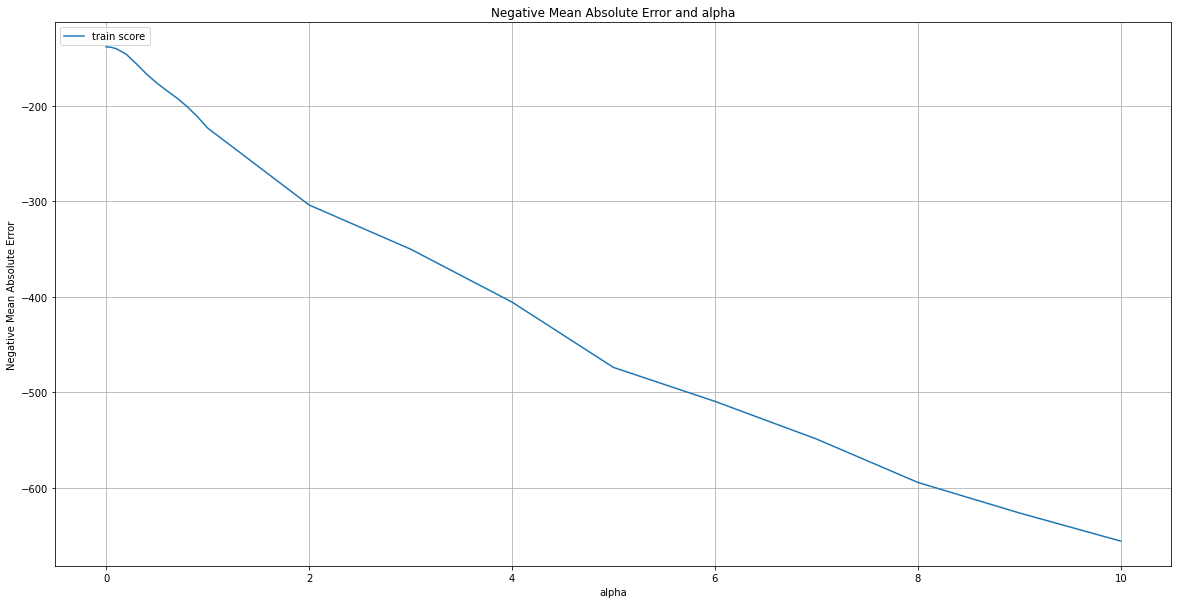

In [ ]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(20,10))
#plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.grid()
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [ ]:
alpha = 0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.469e+02, tolerance: 3.378e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


array([ 5.44631607e+00,  7.11510412e-02,  7.50149672e+01, -6.40702816e+00,
       -2.59392754e+00,  4.50344369e+00, -8.82677582e+00, -3.38625752e+01,
       -7.02473975e-01,  1.84252390e+00,  3.45267201e-01, -1.41456003e+01,
       -1.92587043e+01, -1.73359207e+01])

Отобранные регрессоры

In [ ]:
imp_lasso = pd.DataFrame({
    "Varname": X_train.columns,
    "Coefficient": lasso.coef_})
imp_lasso.sort_values(by="Coefficient", ascending=False)

,Varname,Coefficient
2,CPIAUCSL,75.014967
0,DTB3,5.446316
5,Killian,4.503444
9,CFNAI,1.842524
10,UNRATE,0.345267
1,MCUMFN,0.071151
8,Close,-0.702474
4,IPG211111CN,-2.593928
3,GEPU_current,-6.407028
6,IRLTLT01USM156N,-8.826776


In [ ]:
from sklearn import metrics 

In [ ]:
y_pred = lasso.predict(X_test)

In [ ]:
metrics.explained_variance_score(y_test,y_pred)

0.8159124263522874

In [ ]:
metrics.r2_score(y_test,y_pred)


0.8159123933341997

Плохо

# Попробуем взять различные промежутки данных

In [ ]:
df_50 = df[(df.index>np.percentile(df.index, 80)) & (df.index<=np.percentile(df.index, 100))]
y_50 = df_50["target"]
X_50 = df_50[list(df_50.columns[1:])]
X_50_train, X_50_test, y_50_train, y_50_test = train_test_split(X_50, y_50, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [ ]:
scaler = StandardScaler()
X_50_train[['DTB3', 	'MCUMFN', 	'CPIAUCSL', 	'GEPU_current', 	'IPG211111CN', 	'Killian', 
   'IRLTLT01USM156N', 'M2SL', 'Close', 'CFNAI', 'UNRATE', 'Imports', 'Production', 'Stocks']]=scaler.fit_transform(X_50_train[['DTB3', 	'MCUMFN', 	'CPIAUCSL', 	'GEPU_current', 	'IPG211111CN', 	'Killian', 
   'IRLTLT01USM156N', 'M2SL', 'Close', 'CFNAI', 'UNRATE', 'Imports', 'Production', 'Stocks']])
X_50_test[['DTB3', 	'MCUMFN', 	'CPIAUCSL', 	'GEPU_current', 	'IPG211111CN', 	'Killian', 
   'IRLTLT01USM156N', 'M2SL', 'Close', 'CFNAI', 'UNRATE', 'Imports', 'Production', 'Stocks']]=scaler.transform(X_50_test[['DTB3', 	'MCUMFN', 	'CPIAUCSL', 	'GEPU_current', 	'IPG211111CN', 	'Killian', 
   'IRLTLT01USM156N', 'M2SL', 'Close', 'CFNAI', 'UNRATE', 'Imports', 'Production', 'Stocks']])


In [ ]:
lasso = Lasso()
params = {'alpha' : [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}
folds = 5
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_50_train, y_50_train) 


Fitting 5 folds for each of 23 candidates, totalling 115 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.762e+03, tolerance: 8.127e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.446e+03, tolerance: 7.636e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

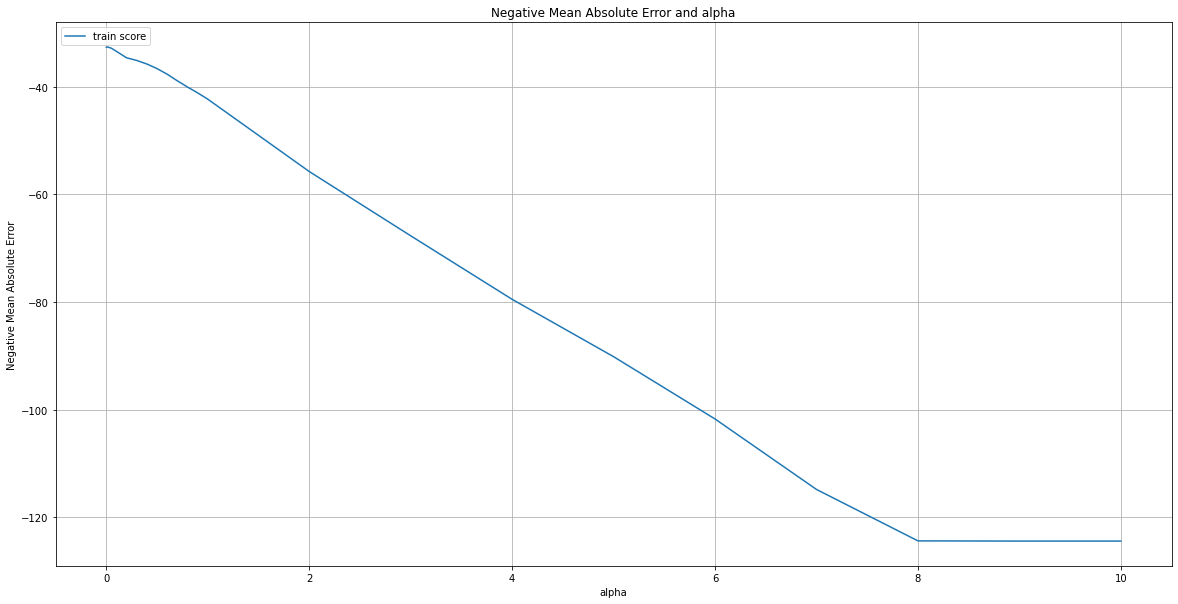

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(20,10))
#plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.grid()
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [ ]:
alpha = 0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_50_train, y_50_train) 
lasso.coef_

array([-1.24232104,  0.        ,  5.20798906, -1.0961641 , -1.10011544,
        0.63129374,  5.55664232, -8.41194059, 10.39090271,  1.7898802 ,
       -1.15686088,  1.40001221,  0.        , -5.31528448])

In [ ]:
imp_lasso = pd.DataFrame({
    "Varname": X_50_train.columns,
    "Coefficient": lasso.coef_})
imp_lasso.sort_values(by="Coefficient", ascending=False)

,Varname,Coefficient
8,Close,10.390903
6,IRLTLT01USM156N,5.556642
2,CPIAUCSL,5.207989
9,CFNAI,1.789880
11,Imports,1.400012
5,Killian,0.631294
1,MCUMFN,0.000000
12,Production,0.000000
3,GEPU_current,-1.096164
4,IPG211111CN,-1.100115


In [ ]:
y_pred = lasso.predict(X_50_test)
metrics.r2_score(y_50_test,y_pred)

0.7947367156248168